# Load data

In [10]:
import pandas as pd

file_path = '../Cleaned Data/employment_status_data.csv'
data = pd.read_csv(file_path)

print(data.sample(10))
print(data.info())

        Age  Gender           Race       Province  Chronic Illnesses  \
40548    33    Male  African/Black        Gauteng              False   
259413   22  Female  African/Black        Gauteng              False   
410158   29  Female  African/Black     Free State              False   
93512    55  Female  African/Black     North West               True   
104858   56  Female  African/Black        Gauteng              False   
96339    53  Female  African/Black  Northern Cape              False   
103855   49    Male  African/Black        Gauteng              False   
467983   43    Male  African/Black        Gauteng              False   
201167   32    Male          White     North West              False   
68996    44    Male  African/Black   Eastern Cape              False   

        Disabilities Education Level  Social Grants Employment Status  
40548           True        Tertiary          False          Employed  
259413         False       Secondary          False        Unem

# V1

## Shuffling, Spliting and Encoding the data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Splitting the dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Preparing categorical data for training
categorical_features = ['Gender', 'Race', 'Province', 'Education Level']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")

train_data_transformed = transformer.fit_transform(train_data.drop('Employment Status', axis=1))
test_data_transformed = transformer.transform(test_data.drop('Employment Status', axis=1))

# Encode the target variable
target_encoder = OneHotEncoder(sparse=False)
train_labels = target_encoder.fit_transform(train_data[['Employment Status']])
test_labels = target_encoder.transform(test_data[['Employment Status']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Define NN architecture

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(train_data_transformed.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for two classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,602 (53.13 KB)

 Trainable params: 13,602 (53.13 KB)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [5]:
import numpy as np

# Convert the data to float32
train_data_transformed = np.array(train_data_transformed, dtype=np.float32)
test_data_transformed = np.array(test_data_transformed, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

# Check for NaN values and replace them if any
train_data_transformed = np.nan_to_num(train_data_transformed)
test_data_transformed = np.nan_to_num(test_data_transformed)

# Now try to train the model again
history = model.fit(train_data_transformed, train_labels,
                    epochs=10,
                    batch_size=256,
                    validation_data=(test_data_transformed, test_labels))

Epoch 1/10
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6835 - loss: 0.5803 - val_accuracy: 0.6978 - val_loss: 0.5325
Epoch 2/10
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7133 - loss: 0.5198 - val_accuracy: 0.7153 - val_loss: 0.5174
Epoch 3/10
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7141 - loss: 0.5193 - val_accuracy: 0.7153 - val_loss: 0.5192
Epoch 4/10
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7174 - loss: 0.5156 - val_accuracy: 0.7102 - val_loss: 0.5214
Epoch 5/10
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7177 - loss: 0.5147 - val_accuracy: 0.7209 - val_loss: 0.5134
Epoch 6/10
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7186 - loss: 0.5148 - val_accuracy: 0.7113 - val_loss: 0.5183
Epoch 7/10
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7187 - loss: 0.5141 - val_accuracy: 0.7199 - val_loss: 0.5134
Epoch 8/10
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7185 - loss: 0.5131 - 

## Evaluation

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data_transformed, test_labels)
print("Test Accuracy:", test_accuracy)

3011/3011 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7205 - loss: 0.5125
Test Accuracy: 0.7183796167373657


## Visualize Training History

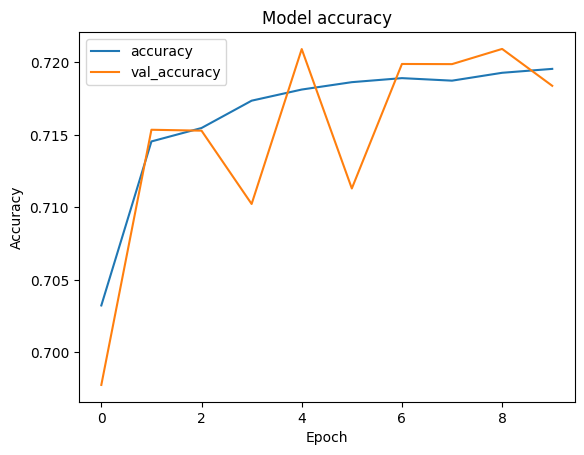

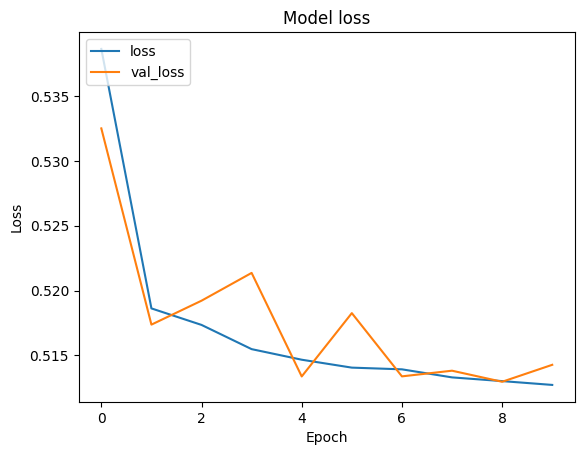

In [7]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## Model's performance

In [8]:
# Predict the probabilities for the test data
predictions = model.predict(test_data_transformed)
# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)
# Calculate the accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

3011/3011 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Accuracy: 71.84%


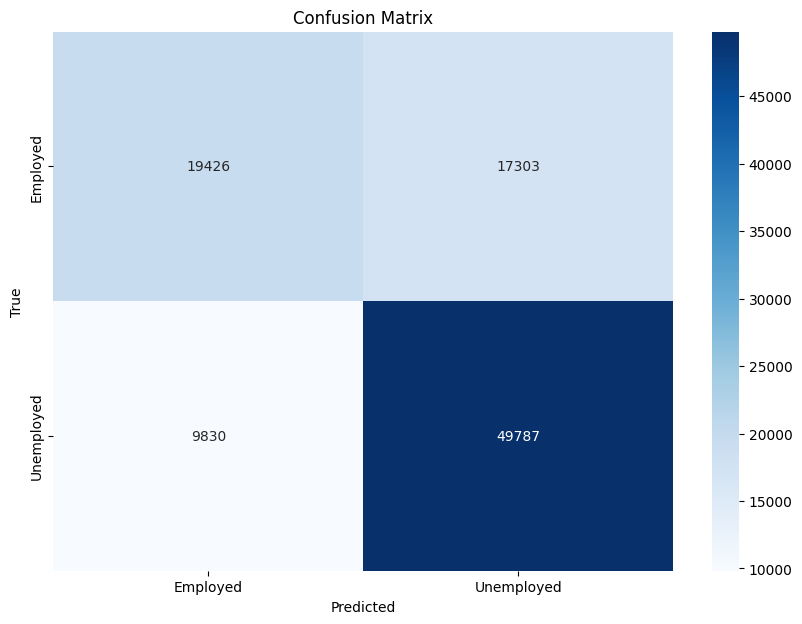

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.categories_[0], yticklabels=target_encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# V2

Epoch 1/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6394 - loss: 0.6313 - val_accuracy: 0.7150 - val_loss: 0.5232
Epoch 2/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7116 - loss: 0.5260 - val_accuracy: 0.7070 - val_loss: 0.5238
Epoch 3/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7135 - loss: 0.5209 - val_accuracy: 0.7207 - val_loss: 0.5159
Epoch 4/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7154 - loss: 0.5194 - val_accuracy: 0.7193 - val_loss: 0.5191
Epoch 5/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7163 - loss: 0.5187 - val_accuracy: 0.7195 - val_loss: 0.5151
Epoch 6/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7170 - loss: 0.5170 - val_accuracy: 0.7180 - val_loss: 0.5155
Epoch 7/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7161 - loss: 0.5180 - val_accuracy: 0.7193 - val_loss: 0.5171
Epoch 8/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7172 - loss: 0.5181 

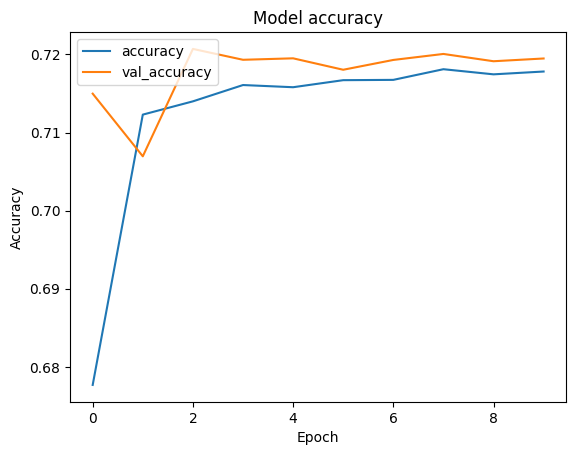

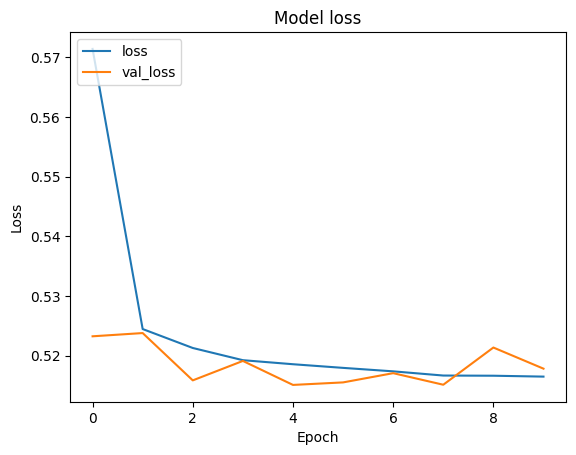

3011/3011 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


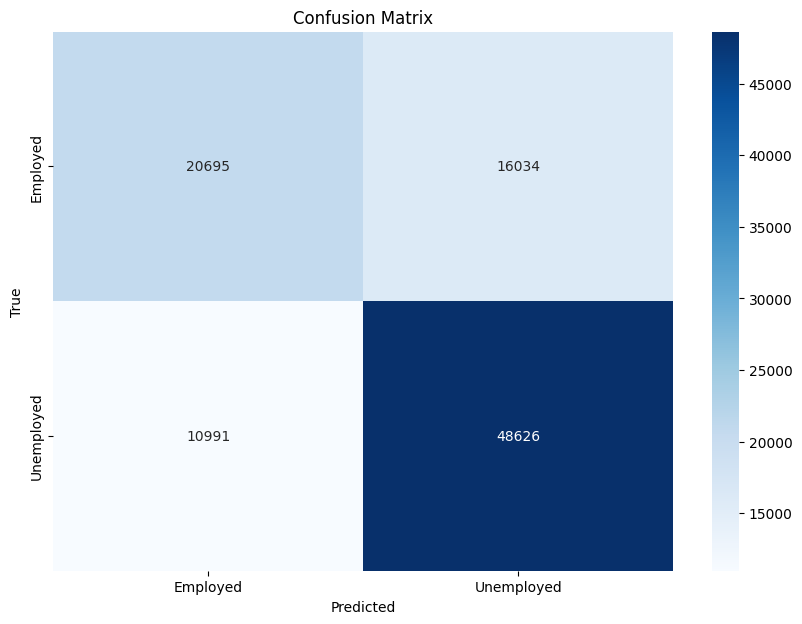

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = '../Cleaned Data/employment_status_data.csv'
data = pd.read_csv(file_path)

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Splitting the dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Preparing categorical data for training using one-hot encoding
categorical_features = ['Gender', 'Race', 'Province', 'Education Level']
one_hot = OneHotEncoder(sparse_output=False)
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")

train_data_transformed = transformer.fit_transform(train_data.drop('Employment Status', axis=1))
test_data_transformed = transformer.transform(test_data.drop('Employment Status', axis=1))

# Convert the data to float32
train_data_transformed = np.array(train_data_transformed, dtype=np.float32)
test_data_transformed = np.array(test_data_transformed, dtype=np.float32)

# Encode the target variable using one-hot encoding
target_encoder = OneHotEncoder(sparse_output=False)
train_labels = target_encoder.fit_transform(train_data[['Employment Status']])
test_labels = target_encoder.transform(test_data[['Employment Status']])
train_labels = np.array(train_labels, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

# Build the neural network model
model = Sequential([
    Input(shape=(train_data_transformed.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_data_transformed, train_labels,
                    epochs=50,
                    batch_size=256,
                    validation_data=(test_data_transformed, test_labels),
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data_transformed, test_labels)
print("Test Accuracy:", test_accuracy)

# Visualize the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Compute the confusion matrix
predictions = model.predict(test_data_transformed)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.categories_[0], yticklabels=target_encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Predict the probabilities for the test data
predictions = model.predict(test_data_transformed)
# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)
# Calculate the accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

3011/3011 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Accuracy: 71.95%


# Summary

## Model Optimization: Changes and Rationales

In the process of refining our neural network model to predict employment status, several changes were implemented between the initial version (v1) and the improved version (v2). These adjustments aimed to enhance model accuracy and generalization. Here are the detailed changes and their rationales:

### 1. **Increased Model Complexity**
- **From:** Single-layer architecture.
- **To:** Multi-layer architecture with more neurons.
- **Rationale:** Adding more layers and neurons allows the model to learn more complex patterns in the data. This is crucial for capturing the nuances that distinguish between different employment statuses.

### 2. **Incorporation of Dropout Layers**
- **New Feature:** Dropout layers added after each Dense layer (except the output layer).
- **Rationale:** Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time. This ensures that the model does not rely too heavily on any single node, promoting generalization.

### 3. **Introduction of Early Stopping**
- **New Feature:** Early stopping during training.
- **Rationale:** Early stopping monitors the validation loss and stops training when it no longer decreases, thereby preventing overfitting and saving computational resources. This technique also helps in selecting the optimal number of epochs by restoring weights from the epoch with the best validation loss.

### 4. **Adjustment of Training Epochs**
- **From:** Fixed small number of epochs (e.g., 10).
- **To:** Potentially higher number of epochs (up to 50), but controlled by early stopping.
- **Rationale:** Increasing the maximum number of epochs allows the model more opportunity to learn and adapt. However, the actual number of epochs executed is managed by early stopping, ensuring training is halted at the optimal point for performance.

### 5. **Changes in Hyperparameters**
- **Batch Size:** Maintained at 256, balancing training speed and model stability.
- **Optimizer:** Continued with Adam due to its effectiveness in handling sparse gradients on noisy problems.

These enhancements are designed to provide a robust framework for the neural network, aiming to improve its ability to generalize well to new, unseen data while mitigating the risk of overfitting.